In [1]:
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

import cnn_builder as cbuild
import cnn_methods as cfunc
import config
import csv
import helper_fxns as hf
import importlib
import matplotlib.pyplot as plt
import numpy as np
import operator
import os
import pandas as pd
import random
%matplotlib inline

Using TensorFlow backend.


In [5]:
importlib.reload(config)
importlib.reload(cfunc)
importlib.reload(hf)
importlib.reload(cbuild)
C = config.Config()

In [ ]:
cbuild.overnight_run([C])#C_list)

C_list = [config.Config(), config.Config()]
C_list[0].dims = [36,36,12]
C_list[1].dims = [24,24,12]
C_list[0].artif_dir = "E:\\imgs\\artif_imgs_3612\\"
C_list[1].artif_dir = "E:\\imgs\\artif_imgs_2412\\"
C_list[0].aug_dir = "E:\\imgs\\aug_imgs_3612_cropint\\"
C_list[1].aug_dir = "E:\\imgs\\aug_imgs_2412_cropint\\"
C_list[0].orig_dir = "E:\\imgs\\orig_imgs_3612_cropint\\"
C_list[1].orig_dir = "E:\\imgs\\orig_imgs_2412_cropint\\"

In [7]:
model = cbuild.build_cnn(C, 'adam', f=[64,128,128], dropout=[0.1,0.1], padding=['same','valid'],
                         merge_layer=1, dilation_rate=(1,1,1), kernel_size=(3,3,2), non_imaging_inputs=False)#Adam(lr=.005)
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 24, 24, 12, 1) 0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 24, 24, 12, 1) 0                                            
____________________________________________________________________________________________________
input_3 (InputLayer)             (None, 24, 24, 12, 1) 0                                            
____________________________________________________________________________________________________
conv3d_1 (Conv3D)                (None, 24, 24, 12, 64 1216        input_1[0][0]                    
___________________________________________________________________________________________

model = cbuild.run_cnn(model, C)

In [6]:
X_test, Y_test, train_generator, num_samples, _, Z = cbuild.get_cnn_data(C, n=4, n_art=0, run_2d=False)
Z_test, Z_train_orig = Z

In [ ]:
early_stopping = EarlyStopping(monitor='loss', min_delta=0.002, patience=3)
model.fit_generator(train_generator, steps_per_epoch=100, epochs=5, callbacks=[early_stopping])

In [13]:
voi_df_art = pd.read_csv(C.art_voi_path)
voi_df_ven = pd.read_csv(C.ven_voi_path)
voi_df_eq = pd.read_csv(C.eq_voi_path)
small_voi_df = pd.read_csv(C.small_voi_path)

In [10]:
C.output_img_dir = "Z:\\OUTPUT\\12-gg"
C.classes_to_include

['hcc', 'cholangio', 'colorectal', 'cyst', 'hemangioma', 'fnh']

In [71]:
#plot_with_bbox(fn_list[2], cls_mapping[wrong_guesses[2]])
Y_pred = model.predict(X_test)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_test])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#cfunc.save_output(Z_test, y_pred, y_true, voi_df_art, small_voi_df, C.classes_to_include, C)

In [72]:
fn_list = fn_list + list(Z_test[~np.equal(y_pred, y_true)])

In [74]:
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])
fn_list = fn_list + list(Z_train_orig[~np.equal(y_pred, y_true)])

In [75]:
fn_x_list = [x+"("+str(voi_df_art[voi_df_art["id"] == x[:-4]]["x1"].values[0])+")" for x in fn_list]

In [76]:
unique, counts = np.unique(fn_x_list, return_counts=True)

In [77]:
dict(zip(unique, counts))

{'12090000_0.npy(88)': 1,
 '12229245_0.npy(89)': 1,
 '12502068_1.npy(94)': 1,
 '12569826_1.npy(135)': 1,
 '12572068_0.npy(133)': 1,
 '12739056_0.npy(33)': 1,
 '12802987_0.npy(61)': 1,
 '12874178_0.npy(49)': 1,
 '12884208_0.npy(184)': 1,
 '12892445_0.npy(88)': 1,
 '12917515_0.npy(87)': 1,
 '12960946_0.npy(90)': 1,
 '13031955_0.npy(55)': 1,
 '13031955_1.npy(78)': 1,
 '13064153_2.npy(94)': 1,
 '13067898_0.npy(116)': 1,
 '13092836_1.npy(123)': 1,
 '13094833_0.npy(120)': 1,
 '13147226_2.npy(228)': 1,
 'E100217760_0.npy(69)': 1,
 'E100269443_0.npy(66)': 1,
 'E100288902_0.npy(52)': 2,
 'E100385703_0.npy(110)': 1,
 'E100563300_0.npy(60)': 2,
 'E100587476_0.npy(87)': 1,
 'E100592424_2.npy(64)': 2,
 'E100761453_0.npy(224)': 1,
 'E100962970_0.npy(59)': 1,
 'E101083458_0.npy(125)': 1,
 'E101083458_3.npy(55)': 3,
 'E101083458_4.npy(118)': 1,
 'E101166449_0.npy(96)': 4,
 'E101179822_1.npy(174)': 1,
 'E101414242_0.npy(65)': 4,
 'E101442376_0.npy(68)': 2,
 'E101483270_0.npy(138)': 2,
 'E101544573_0.np

In [73]:
Y_pred = model.predict(X_train_orig)
y_true = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_train_orig])
y_pred = np.array([max(enumerate(x), key=operator.itemgetter(1))[0] for x in Y_pred])

cm = confusion_matrix(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average="weighted")

#cfunc.save_output(Z_train_orig, y_pred, y_true, voi_df_art, small_voi_df, C.classes_to_include, C)#, save_dir=C.output_img_dir+"\\training")

In [12]:
cm

array([[18,  0,  1,  0,  0,  0],
       [ 0,  9,  2,  0,  0,  0],
       [ 0,  0, 14,  0,  0,  0],
       [ 0,  0,  0, 16,  0,  0],
       [ 0,  2,  0,  0, 11,  0],
       [ 2,  1,  1,  0,  0, 10]], dtype=int64)

In [34]:
y_true_simp, y_pred_simp, _ = cfunc.condense_cm(y_true, y_pred, C.classes_to_include)

In [35]:
accuracy_score(y_true_simp, y_pred_simp)

0.875

In [33]:
accuracy_score(y_true, y_pred)

0.81818181818181823

-3.0 3.0 -1.09655824525


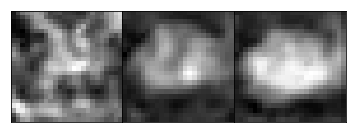

In [16]:
a=next(train_generator)
imgtrain = a[0][0][0]
img = imgtrain
hf.plot_section_auto_1ch(imgtrain[:,:,:,0])
print(np.amin(img), np.amax(img), np.mean(img))

-1.0 1.0 0.166082977132


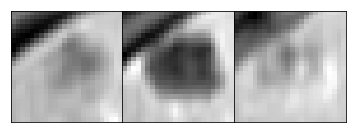

In [25]:
imgtest = X_train[0][1]
img = imgtest
print(np.amin(img), np.amax(img), np.mean(img))
hf.plot_section_auto_1ch(imgtest[:,:,:,0])

In [12]:
nb_classes = len(C.classes_to_include)
voi_df = pd.read_csv(C.art_voi_path)
orig_data_dict, num_samples = cfunc.collect_unaug_data(C, voi_df)
print(num_samples)

avg_X2 = {}
for cls in C.classes_to_include:
    avg_X2[cls] = np.mean(orig_data_dict[cls][1], axis=0)

{'fnh': 84, 'cholangio': 58, 'hcc': 109, 'colorectal': 87, 'hemangioma': 82, 'cyst': 74}


In [69]:
train_ids = {} #filenames of training set originals
test_ids = {} #filenames of test set
X_test = []
X2_test = []
Y_test = []
Z_test = []
X_train_orig = []
X2_train_orig = []
Y_train_orig = []
Z_train_orig = []

train_samples = {}

for cls_num, cls in enumerate(orig_data_dict):
    cls_num = C.classes_to_include.index(cls)

    train_samples[cls] = round(num_samples[cls]*C.train_frac)

    order = np.random.permutation(list(range(num_samples[cls])))
    train_ids[cls] = list(orig_data_dict[cls][2][order[:train_samples[cls]]])
    test_ids[cls] = list(orig_data_dict[cls][2][order[train_samples[cls]:]])

    X_test = X_test + list(orig_data_dict[cls][0][order[train_samples[cls]:]])
    X2_test = X2_test + list(orig_data_dict[cls][1][order[train_samples[cls]:]])
    Y_test = Y_test + [[0] * cls_num + [1] + [0] * (nb_classes - cls_num - 1)] * \
                        (num_samples[cls] - train_samples[cls])
    Z_test = Z_test + test_ids[cls]

    X_train_orig = X_train_orig + list(orig_data_dict[cls][0][order[:train_samples[cls]]])
    X2_train_orig = X2_train_orig + list(orig_data_dict[cls][1][order[:train_samples[cls]]])
    Y_train_orig = Y_train_orig + [[0] * cls_num + [1] + [0] * (nb_classes - cls_num - 1)] * \
                        (train_samples[cls])
    Z_train_orig = Z_train_orig + train_ids[cls]

    print("%s has %d samples for training (%d after augmentation) and %d for testing" %
          (cls, train_samples[cls], train_samples[cls] * C.aug_factor, num_samples[cls] - train_samples[cls]))

#Y_test = np_utils.to_categorical(Y_test, nb_classes)
#Y_train_orig = np_utils.to_categorical(Y_train_orig, nb_classes)
X_test = [np.array(X_test), np.array(X2_test)]
X_train_orig = [np.array(X_train_orig), np.array(X2_train_orig)]

Y_test = np.array(Y_test)
Y_train_orig = np.array(Y_train_orig)

Z_test = np.array(Z_test)
Z_train_orig = np.array(Z_train_orig)

X_test = cfunc.separate_phases(X_test)
X_train_orig = cfunc.separate_phases(X_train_orig)

fnh has 55 samples for training (5500 after augmentation) and 14 for testing
cholangio has 45 samples for training (4500 after augmentation) and 11 for testing
hcc has 74 samples for training (7400 after augmentation) and 19 for testing
cyst has 63 samples for training (6300 after augmentation) and 16 for testing
colorectal has 58 samples for training (5800 after augmentation) and 14 for testing
hemangioma has 54 samples for training (5400 after augmentation) and 13 for testing


In [70]:
#early_stopping = EarlyStopping(monitor='acc', min_delta=0.01, patience=4)
train_generator = cbuild.train_generator_func(C, train_ids, voi_df, avg_X2, n=4, n_art=0)
hist = model.fit_generator(train_generator, steps_per_epoch=350, epochs=25, validation_data=[X_test, Y_test])#, callbacks=[early_stopping])

Epoch 1/25
350/350 [==============================] - 48s - loss: 0.8031 - acc: 0.7480 - val_loss: 1.4704 - val_acc: 0.5172
Epoch 2/25
350/350 [==============================] - 43s - loss: 0.4688 - acc: 0.8742 - val_loss: 0.6460 - val_acc: 0.8391
Epoch 3/25
350/350 [==============================] - 44s - loss: 0.3346 - acc: 0.9135 - val_loss: 0.7043 - val_acc: 0.7816
Epoch 4/25
350/350 [==============================] - 43s - loss: 0.2505 - acc: 0.9342 - val_loss: 0.5728 - val_acc: 0.7931
Epoch 5/25
350/350 [==============================] - 43s - loss: 0.2093 - acc: 0.9439 - val_loss: 0.6325 - val_acc: 0.7471
Epoch 6/25
350/350 [==============================] - 44s - loss: 0.1657 - acc: 0.9573 - val_loss: 0.5589 - val_acc: 0.8161
Epoch 7/25
350/350 [==============================] - 44s - loss: 0.1274 - acc: 0.9673 - val_loss: 0.5970 - val_acc: 0.8161
Epoch 8/25
350/350 [==============================] - 44s - loss: 0.1155 - acc: 0.9720 - val_loss: 0.4255 - val_acc: 0.8391
Epoch 9/

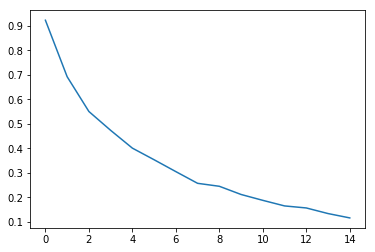

In [369]:
plt.plot(hist.history['loss'])

hist = model.fit(X_train2, Y_train2, batch_size=32, epochs=200, validation_data=(X_test, Y_test), callbacks=[early_stopping])

cm = [[],[],[],[],[],[],[]]

cm[0] = [[18,0,0,0,0,1],[0,10,0,0,0,1],[0,1,13,0,0,0],[0,0,1,15,0,0],[0,2,0,0,11,0],[1,1,0,0,0,12]]
cm[1] = [[19,0,0,0,0,0],[0,11,0,0,0,0],[0,1,13,0,0,0],[0,0,2,14,0,0],[0,1,0,0,12,0],[2,0,0,0,0,12]]
cm[2] = [[17,0,0,0,0,2],[0,8,3,0,0,0],[1,1,12,0,0,0],[0,0,0,16,0,0],[1,0,1,1,10,0],[2,1,0,0,1,10]]
cm[3] = [[16,0,0,0,0,3],[0,10,1,0,0,0],[0,1,13,0,0,0],[0,0,2,12,1,1],[0,2,1,0,10,0],[3,2,0,0,0,9]]
cm[4] = [[15,0,0,0,0,4],[0,7,3,0,1,0],[0,0,14,0,0,0],[0,0,1,15,0,0],[0,0,1,0,11,1],[1,0,0,0,0,13]]
cm[5] = [[17,0,0,0,0,2],[0,9,1,0,1,0],[0,0,13,1,0,0],[0,0,1,15,0,0],[0,0,1,0,11,1],[3,1,0,0,0,10]]
cm[6] = [[18,0,0,0,0,1],[0,11,0,0,0,0],[2,2,10,0,0,0],[0,0,1,15,0,0],[1,1,1,0,10,0],[5,0,1,0,0,8]]

for x in range(7):
    cm[x] = np.array(cm[x])
cm = np.array(cm)

cmf = np.zeros([6,6])
for i in range(6):
    for j in range(6):
        cmf[i,j] = sum(cm[:,i,j])
        
for i in range(6):
    for j in range(6):
        print(cmf[j,i],end="\t")
    print("")

fn_list = Z_test[~np.equal(y_pred, y_true)]
wrong_guesses = np.array(y_pred)[~np.equal(y_pred, y_true)]

activ = model2.predict(X_train)
#activ = model2.predict(np.expand_dims(X_train[10],axis=0))

import operator
#print("Ground truth:", [C.classes_to_include[max(enumerate(x), key=operator.itemgetter(1))[0]] for x in Y_val[::30]])
Y_ = model.predict(X_test)
print("Predictions:", [C.classes_to_include[max(enumerate(x), key=operator.itemgetter(1))[0]] + " (%.5f%% probability)" % (max(x)*100) for x in Y_])